# Falcons And Mice

See if we can come up with the correct parameters to model a falcon-mouse predator-prey interaction.  Here is a nice Wikipedia entry on [Lotka-Volterra](https://en.wikipedia.org/wiki/Lotka%E2%80%93Volterra_equations), a thing of true beauty.

## The Notation

Let's try to line up with the Wikipedia article (with TeX) this will be hard.  The left-hand-sides are

* The term $$\frac{dx}{dt}$$ means the "change in x over time", and they are using "x" to mean the number of *prey*, here *mice*.
* The term ```dy/dt``` means the "change in y over time", and they are using "y" to mean the number of *predators*, here *falcons*.


#### Prep stuff
First, set the working directory.  Not actually sure we'll need to do this

$$\frac{2}{3}$$

In [ ]:
WD = "/Users/buddha/github/buddha314/predator-prey/src"
setwd(WD)

## Parameters

We need to know a bit about each species, like how effectively can Falcons hunt and how effectively mice can reproduce.

In [ ]:
# Decide how effective everyone is
falcon_hunting_success_rate = 0.005
falcon_reproductive_rate = 0.001

mouse_reproductive_rate = 0.4

# What does it look like on day one?
n_falcons_day_one = 10
n_mice_day_one = 300
n_days_to_run = 60

### Prep
Create a data frame for populating the results

In [ ]:
results = data.frame(
  day=1
, falcons=n_falcons_day_one
, falcons_fed = n_falcons_day_one
, falcons_born = 0
, mice=n_mice_day_one
, mice_born = 0
, mice_eaten = 0
)

## The Simulation
Okay, run it!  See what we come up with

In [ ]:
for (i in 2:n_days_to_run) {
  print(paste("Evaluating day", i)) 
  # Look at what we had yesterday
  falcons_yesterday = results[(i-1),"falcons"]
  mice_yesterday = results[(i-1), "mice"]
  
  # Figure out how many survived from yesterday
  falcons_born = falcons_yesterday * falcon_reproductive_rate # How many born yestery
  falcons_fed =  falcons_yesterday * falcon_hunting_success_rate * mice_yesterday # How many got to eat
  # So today we have
  falcons_today = falcons_fed + falcons_born
  
  mice_born = mice_yesterday * mouse_reproductive_rate # How many born
  # Below we use "min" to say that the falcons can't eat more mice than exist
  mice_eaten = min(mice_yesterday, mice_yesterday * falcons_yesterday * (1-falcon_hunting_success_rate)) # How many did the falcons get
  # So today we have
  mice_today = mice_yesterday + mice_born - mice_eaten
  

  # Add the new numbers to our results.  We use the max(x,y) function to keep things above 0,
  # you can't have -1 falcons
  results = rbind(
      results
    , data.frame(day=i
                 , falcons=max(0,falcons_today)
                 , falcons_born = max(0,falcons_born) 
                 , falcons_fed = max(0,falcons_fed)
                 , mice=max(0,mice_today)
                 , mice_born = max(0,mice_born)
                 , mice_eaten = max(0,mice_eaten)
                 )
  )
  
}

## Results Table
This will output one row for every day of the simulation.

[1] "Evaluating day 2"
[1] "Evaluating day 3"
[1] "Evaluating day 4"
[1] "Evaluating day 5"
[1] "Evaluating day 6"
[1] "Evaluating day 7"
[1] "Evaluating day 8"
[1] "Evaluating day 9"
[1] "Evaluating day 10"
[1] "Evaluating day 11"
[1] "Evaluating day 12"
[1] "Evaluating day 13"
[1] "Evaluating day 14"
[1] "Evaluating day 15"
[1] "Evaluating day 16"
[1] "Evaluating day 17"
[1] "Evaluating day 18"
[1] "Evaluating day 19"
[1] "Evaluating day 20"
[1] "Evaluating day 21"
[1] "Evaluating day 22"
[1] "Evaluating day 23"
[1] "Evaluating day 24"
[1] "Evaluating day 25"
[1] "Evaluating day 26"
[1] "Evaluating day 27"
[1] "Evaluating day 28"
[1] "Evaluating day 29"
[1] "Evaluating day 30"
[1] "Evaluating day 31"
[1] "Evaluating day 32"
[1] "Evaluating day 33"
[1] "Evaluating day 34"
[1] "Evaluating day 35"
[1] "Evaluating day 36"
[1] "Evaluating day 37"
[1] "Evaluating day 38"
[1] "Evaluating day 39"
[1] "Evaluating day 40"
[1] "Evaluating day 41"
[1] "Evaluating day 42"
[1] "Evaluating day 43"


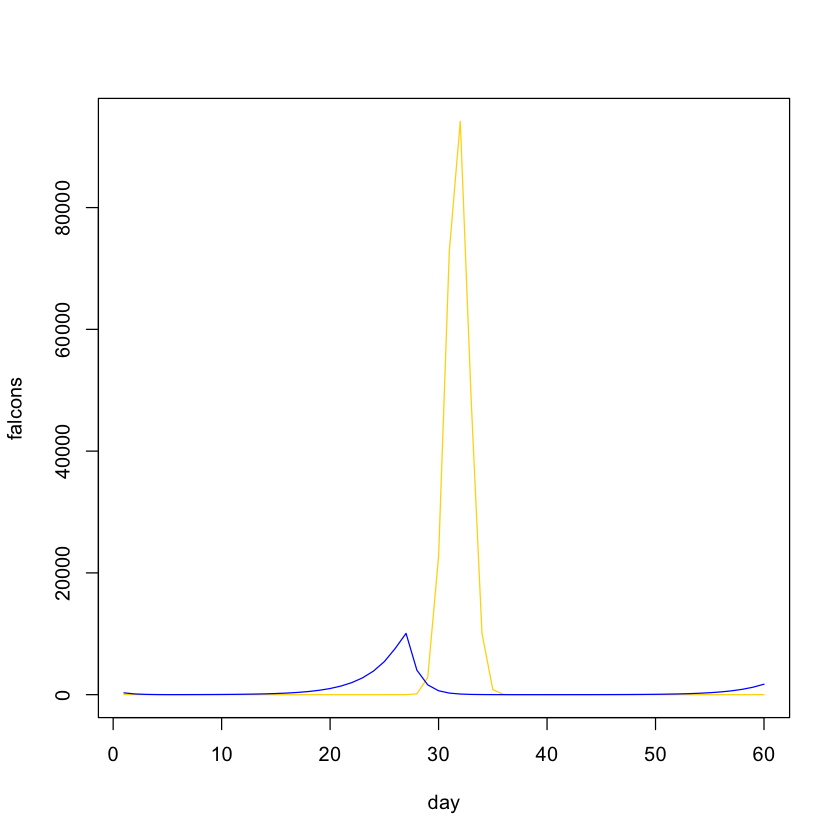

In [1]:

  
 
print(results)
plot(falcons ~ day, type="l", col="gold", data=results)
lines(mice ~ day, col="blue", data=results)

